<a href="https://colab.research.google.com/github/MatteoBettini/Autonomous-Vehicles-Consensus-2021/blob/main/Project%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook initialisation

The first cell requires the user to press enter

## Install SUMO

In [1]:
!sudo add-apt-repository ppa:sumo/stable
!sudo apt-get update
!sudo apt-get install sumo sumo-tools sumo-doc
import os
os.environ['SUMO_HOME'] = '/usr/share/sumo'
!sumo

 SUMO is a highly portable, microscopic traffic simulation package designed to handle large road networks. SUMO is open source, licensed under the EPLv2.
 More info: https://launchpad.net/~sumo/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [52.7 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:

## Clone repository

In [2]:
!git clone https://github.com/MatteoBettini/Autonomous-Vehicles-Consensus-2021

Cloning into 'Autonomous-Vehicles-Consensus-2021'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 344 (delta 128), reused 313 (delta 103), pack-reused 0
Receiving objects: 100% (344/344), 27.83 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [3]:
import os
os.chdir('/content/Autonomous-Vehicles-Consensus-2021')

## Install dependencies

In [4]:
!pip install traci sumolib
!pip install ray==0.8.0

     |████████████████████████████████| 225kB 5.4MB/s 
     |████████████████████████████████| 143kB 8.4MB/s 
     |████████████████████████████████| 72.9MB 1.2MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 


# Run simulations

In [5]:
# To plot figures
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
import glob
import json
import subprocess
import numpy as np

from utils import PathUtils, DefaultParams
from plot_sim_results import plot_multiple_results

## Select simulation parameters

In [8]:
# SIM PARAMS
DefaultParams.RING_RADIUS = 41.4
DefaultParams.MAX_SPEED = 30
DefaultParams.TARGET_SPEED = DefaultParams.MAX_SPEED
DefaultParams.MAX_ACCEL = 2
DefaultParams.MAX_DECEL = DefaultParams.MAX_ACCEL
DefaultParams.N_VEHICLES = 10
DefaultParams.N_BROKEN_VEHICLES = 0
DefaultParams.DURATION = 400
DefaultParams.INITIAL_HEADWAY = ((2 * np.pi * DefaultParams.RING_RADIUS) / DefaultParams.N_VEHICLES) - 5  # Vehicle length
DefaultParams.SIM_STEP = 0.1
DefaultParams.TAU = DefaultParams.SIM_STEP + 0.03

# PID HEADWAY PARAMS
DefaultParams.TIME_HEADWAY_IDM = 0.8
DefaultParams.TIME_HEADWAY = 0.6
DefaultParams.TARGET_HEADWAY = DefaultParams.TIME_HEADWAY * DefaultParams.TARGET_SPEED + 2

# INIT PARAMS
DefaultParams.BUNCHING = 0
DefaultParams.PERTURBATION = 0

# CONSENSUS PARMS
DefaultParams.V_INC = 0.2
DefaultParams.N_HOPS = -1

## Choose which controller to simulate


Config can be chosen from:

* ring_consensus_leaderless_config
* ring_idm_config
* ring_gipps_config
* ring_bando_config
* ring_follower_stopper_config
* ring_pid_headway_config

In [9]:
config = 'ring_consensus_leaderless_config'

## Run a single simulation

Round 0, return: 422.6936450985649
./data/ring_LLVC_20210406-1440581617720058.6382434-0_emission.csv ./data
Average, std returns: 422.6936450985649, 0.0
Average, std velocities: 25.361623724970745, 0.0
Average, std outflows: 0.0, 0.0
Total time: 2.06017804145813
steps/second: 271.43865246055753
ring_LLVC



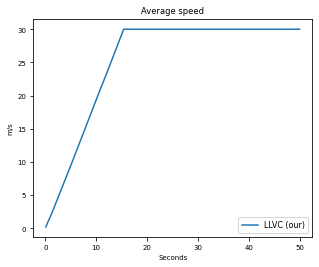

In [10]:
command = ['python',
                PathUtils.run_ring_file,
                '--exp_config', config,
                '--no_render',
                '--no_plot_outcome'
                ]

process = subprocess.Popen(command,
                stdout=subprocess.PIPE,
                stderr=subprocess.PIPE)

output, error = process.communicate()

if output:
    print(output.decode())
if error:
    print(error.decode())

with open(str(PathUtils.ring_json_file), 'r') as f:
    params_dict = json.load(f)
    f.close()

plot_multiple_results(params_dict)

## Run and compare all controllers

Round 0, return: 295.950236176371
./data/ring_IDM_20210406-1441041617720064.2975023-0_emission.csv ./data
Average, std returns: 295.950236176371, 0.0
Average, std velocities: 17.757083139208014, 0.0
Average, std outflows: 0.0, 0.0
Total time: 1.6078059673309326
steps/second: 353.7644363647186
ring_IDM

Round 0, return: 422.6936450985649
./data/ring_LLVC_20210406-1441081617720068.806842-0_emission.csv ./data
Average, std returns: 422.6936450985649, 0.0
Average, std velocities: 25.361623724970745, 0.0
Average, std outflows: 0.0, 0.0
Total time: 1.891272783279419
steps/second: 293.8812557377038
ring_LLVC

Round 0, return: 404.7515078400526
./data/ring_Gipps_20210406-1441131617720073.5889964-0_emission.csv ./data
Average, std returns: 404.7515078400526, 0.0
Average, std velocities: 24.285245006237034, 0.0
Average, std outflows: 0.0, 0.0
Total time: 1.92368483543396
steps/second: 296.3857541217902
ring_Gipps

Round 0, return: 32.368788560784395
./data/ring_Bando_20210406-1441181617720078.40

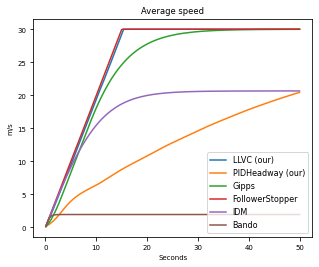

In [11]:
ring_configs = glob.glob(str(PathUtils.exp_configs_folder) + '/ring' + '/*.py')

for config in ring_configs:

    config = config.rsplit('/', 1)[1].rsplit('.',1)[0]

    command = ['python',
                PathUtils.run_ring_file,
                '--exp_config', config,
                '--no_render',
                '--no_plot_outcome'
                ]

    process = subprocess.Popen(command,
                                stdout=subprocess.PIPE,
                                stderr=subprocess.PIPE)

    output, error = process.communicate()

    if output:
        print(output.decode())
    if error:
        print(error.decode())


with open(str(PathUtils.ring_json_file), 'r') as f:
    params_dict = json.load(f)
    f.close()

plot_multiple_results(params_dict)